In [9]:
import pandas as pd

In [15]:
df=pd.read_csv("diabetes.csv")          ###Load the dataset

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.isnull().sum()                     

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [40]:
X=df.drop("Outcome",axis=1).values                                  #Independent feature
y=df["Outcome"].values                                              #Dependent Feature

In [41]:
from sklearn.model_selection import train_test_split                                                  ### Train Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
##import libraries from pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

In [43]:
###Convert all the independent feature and dependent feature into tensor and independent feature mudt be converted into float datatype

X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [44]:
df.shape

(768, 9)

In [51]:
###Creating model with pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_feature=8,hidden1=20,hidden2=20,output_feature=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_feature,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.output=nn.Linear(hidden2,output_feature)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.output(x)
        return x        

In [52]:
###Instantiate my ANN_Model

torch.manual_seed(20)
model=ANN_Model()

In [53]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=2, bias=True)
)>

In [54]:
###Backward Propagation ---Define the loss function and optimiser

In [55]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [56]:
epochs=500
final_losses=[]                              ###Here all the losses would be stored
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number:{} and the loss:{}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number:1 and the loss:3.4572105407714844
Epoch number:11 and the loss:0.8019207119941711
Epoch number:21 and the loss:0.609032154083252
Epoch number:31 and the loss:0.5917771458625793
Epoch number:41 and the loss:0.5679707527160645
Epoch number:51 and the loss:0.5529041886329651
Epoch number:61 and the loss:0.5410094857215881
Epoch number:71 and the loss:0.5310389995574951
Epoch number:81 and the loss:0.5220361351966858
Epoch number:91 and the loss:0.5135972499847412
Epoch number:101 and the loss:0.5061254501342773
Epoch number:111 and the loss:0.49834105372428894
Epoch number:121 and the loss:0.4960551857948303
Epoch number:131 and the loss:0.4828636944293976
Epoch number:141 and the loss:0.4756036400794983
Epoch number:151 and the loss:0.4799237549304962
Epoch number:161 and the loss:0.4792928397655487
Epoch number:171 and the loss:0.4650002717971802
Epoch number:181 and the loss:0.4582023620605469
Epoch number:191 and the loss:0.4527083933353424
Epoch number:201 and the loss:0

In [59]:
###Plot the loss function

import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
###Prediction in X_test data

predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [62]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [63]:
###Compare the prediction value and Actual output data of test datasets

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)

In [64]:
cm

array([[92, 15],
       [18, 29]], dtype=int64)

Text(95.72222222222221, 0.5, 'predicted values')

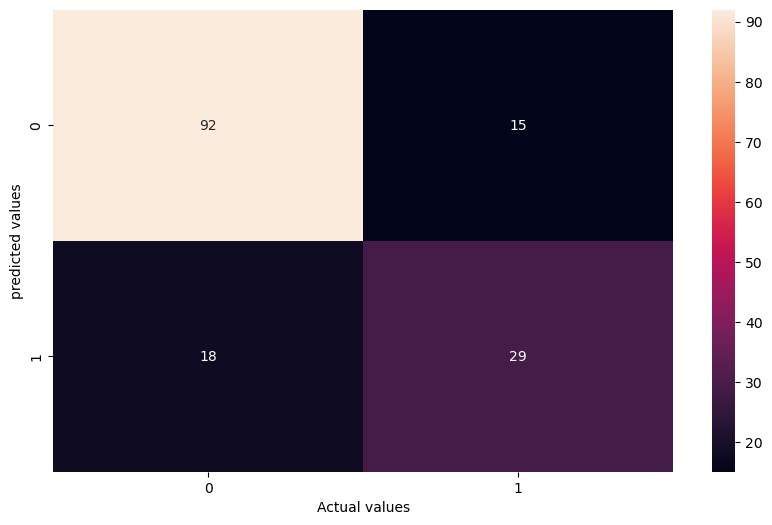

In [66]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual values")
plt.ylabel("predicted values")

In [68]:
##Find out the Accuracy

from sklearn.metrics import accuracy_score
score= accuracy_score(y_test,predictions)

In [69]:
score

0.7857142857142857

In [73]:
##Save the model

torch.save(model,'diabetes.pt')

In [74]:
##Save and load the model

model=torch.load('diabetes.pt')

In [75]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=2, bias=True)
)